In [195]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
suicide2005=pd.read_csv("2005.csv")
suicide2006=pd.read_csv("2006.csv")
suicide2007=pd.read_csv("2007.csv")
suicide2008=pd.read_csv("2008.csv")
suicide2009=pd.read_csv("2009.csv")
suicide2010=pd.read_csv("2010.csv")
suicide2011=pd.read_csv("2011.csv")

In [103]:
suicide2007.columns

Index(['Unnamed: 0', 'state', 'vet_pop', 'overall_pop_18', 'vet_pop_p',
       'vet_suicides', 'all_suicides', 'vet_suicides_p', 'vet_males',
       'vet_males_p', 'vet_females', 'vet_females_p', 'vet_15_24', 'vet_18_29',
       'vet_17_34', 'vet_25_34', 'vet_30_39', 'vet_25_44', 'vet_35_44',
       'vet_40_49', 'vet_35-54', 'vet_45_54', 'vet_50_59', 'vet_45_64',
       'vet_55_64', 'vet_60', 'vet_65', 'vet_rate', 'civ_rate'],
      dtype='object')

In [125]:
frames = [suicide2005, suicide2006, suicide2007, suicide2008, suicide2009, suicide2010, suicide2011]
bigdata = pd.concat(frames)
bigdata.head()
bigdata.to_csv("Cumulated_Data.csv", index=False)
bigdata.columns

Index(['Unnamed: 0', 'state', 'vet_pop', 'overall_pop_18', 'vet_pop_p',
       'vet_suicides', 'all_suicides', 'vet_suicides_p', 'vet_males',
       'vet_males_p', 'vet_females', 'vet_females_p', 'vet_15_24', 'vet_18_29',
       'vet_17_34', 'vet_25_34', 'vet_30_39', 'vet_25_44', 'vet_35_44',
       'vet_40_49', 'vet_35-54', 'vet_45_54', 'vet_50_59', 'vet_45_64',
       'vet_55_64', 'vet_60', 'vet_65', 'vet_rate', 'civ_rate'],
      dtype='object')

In [142]:
## , "vet_15_24", "vet_18_29",
##       "vet_17_34", "vet_25_34", "vet_30_39", "vet_25_44", "vet_35_44",
##     "vet_40_49", "vet_35-54", "vet_45_54", "vet_50_59", "vet_45_64",
##       "vet_55_64", "vet_60", "vet_65"

Y = bigdata.vet_suicides
feature_names = ["state", "vet_pop", 
                 "vet_males", "vet_females"]

X = bigdata[feature_names]
print(X)

             state  vet_pop  vet_males  vet_females
0          Alabama   403950        NaN          NaN
1           Alaska    74482       22.0          2.0
2          Arizona   538880        NaN          NaN
3         Arkansas   259304       79.0          2.0
4       California  2193336      613.0         20.0
5         Colorado   402091      183.0          8.0
6      Connecticut   261294        NaN          NaN
7         Delaware    79151       17.0          0.0
8         Florida*  1717801        NaN          NaN
9          Georgia   731466        NaN          NaN
10          Hawaii   116793        NaN          NaN
11           Idaho   132844       63.0          2.0
12        Illinois   853338        NaN          NaN
13         Indiana   505259      111.0          1.0
14            Iowa   249911        NaN          NaN
15          Kansas   238506       82.0          4.0
16        Kentucky   341752        NaN          NaN
17       Louisiana   337822        NaN          NaN
18          

In [143]:
bigdata.head()

,Unnamed: 0,state,vet_pop,overall_pop_18,vet_pop_p,vet_suicides,all_suicides,vet_suicides_p,vet_males,vet_males_p,...,vet_40_49,vet_35-54,vet_45_54,vet_50_59,vet_45_64,vet_55_64,vet_60,vet_65,vet_rate,civ_rate
0,0,Alabama,403950,3344721,0.120772,135,535,0.252336,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.419978,13.601875
1,1,Alaska,74482,446969,0.166638,24,131,0.183206,22.0,0.916667,...,NaN,NaN,9.0,NaN,NaN,5.0,NaN,4.0,32.222550,28.725835
2,2,Arizona,538880,4238996,0.127124,225,945,0.238095,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.753266,19.458849
3,3,Arkansas,259304,2023819,0.128126,81,400,0.202500,79.0,0.975309,...,NaN,NaN,NaN,NaN,NaN,16.0,NaN,25.0,31.237466,18.078622
4,4,California,2193336,25543447,0.085867,633,3206,0.197442,613.0,0.968404,...,NaN,NaN,NaN,NaN,220.0,NaN,NaN,317.0,28.860147,11.019220


In [144]:
label_encoder = preprocessing.LabelEncoder()
X = X.apply(label_encoder.fit_transform)
X.head()

,state,vet_pop,vet_males,vet_females
0,0,201,182,149
1,1,35,9,2
2,2,261,208,19
3,3,151,48,2
4,4,349,140,15


In [145]:
X = X.fillna(0)
one_hot_encoded_training_parameters = pd.get_dummies(X)

In [146]:
print(X)

    state  vet_pop  vet_males  vet_females
0       0      201        182          149
1       1       35          9            2
2       2      261        208           19
3       3      151         48            2
4       4      349        140           15
5       5      200         91            8
6       6      153        209           29
7       7       43          7            0
8       8      341        210           22
9       9      288        211           21
10     10       62        212           61
11     11       77         37            2
12     12      307        213           35
13     13      249         64            1
14     14      146        214           57
15     15      139         51            4
16     16      176        215           56
17     17      173        216           55
18     18       85        217           53
19     19      236        218           52
20     20      227         28            2
21     21      304        114            7
22     22  

In [147]:
X.isnull().any()

state          False
vet_pop        False
vet_males      False
vet_females    False
dtype: bool

In [179]:
suicide_model_forest = RandomForestRegressor(random_state=1)

train_X_f, val_X_f, train_Y_f, val_Y_f = train_test_split(X,Y,test_size=0.33, random_state=42)
suicide_model.fit(train_X_f, train_Y_f)
value_of_predictions = suicide_model.predict(val_X_f)
print(mean_absolute_error(val_Y_f, value_of_predictions))

12.850000000000003


In [180]:
predictions = suicide_model.predict(X)
print(predictions)

[121.3  22.8 220.5  85.2 630.5 182.   62.9  17.4 573.9 228.4  16.   65.6
 224.7 108.8  77.3  85.9 107.3  95.   26.3 122.3  46.5 236.3 103.1  67.
 169.6  55.7  45.8 100.5  37.4  96.2  80.4 225.9 229.3  25.9 283.3 120.5
 154.1 327.   19.   95.5  25.7 177.7 480.8  49.2   9.9 206.9 226.6  74.6
 136.6  21.2 145.   28.6 192.9  89.1 692.4 161.6  50.2  14.6 573.6 139.8
  31.9  51.4 184.5 115.2  59.6  92.5  91.7  81.2  38.3 106.5  41.9 249.1
 114.   63.8 169.6  52.8  47.8  89.4  37.  105.2  75.4 247.1 197.5  18.5
 273.1 115.4 141.8 309.7  21.  122.   24.  157.5 457.8  67.5  16.6 178.
 198.1  57.6 137.6  22.6 129.8  31.5 220.1  85.4 672.6 185.1  39.   14.6
 571.4 153.8  34.5  45.6 183.  108.8  65.6  87.1  95.8  89.5  26.8 109.2
  49.4 232.5 124.7  84.9 179.6  50.4  41.2  88.   40.4  83.3  94.5 238.3
 230.   26.4 272.9 100.6 156.4 309.7  19.1 125.1  23.5 177.7 441.8  69.4
  18.8 178.  228.1  68.3 137.9  25.1 140.9  27.3 176.8  89.7 717.6 181.6
  44.4  23.9 601.2 165.9  19.8  73.7 229.1 178.3  75.

In [181]:
predicted_suicide_rates = suicide_model.predict(X)
mean_absolute_error(Y, predicted_suicide_rates)

8.425714285714287

In [182]:
## Cross validation

## clf = svm.SVC(kernel='linear', C=1)
## scores = cross_val_score(clf, train_X_f, train_Y_f, cv=3)
## print(scores)

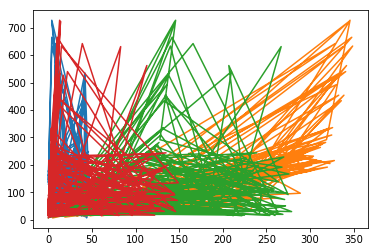

In [191]:
fig, ax = plt.subplots()
ax.plot(train_X_f, train_Y_f)

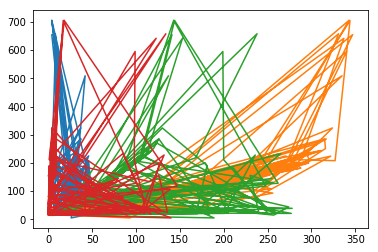

In [194]:
fig2, ax2 = plt.subplots()
ax2.plot(val_X_f, val_Y_f)

In [218]:
## sns.boxplot(x = train_X_f, y = train_Y_f, data=bigdata, palette="PRGn")
## sns.despine(offset=10, trim=True)